In [14]:
from dotenv import load_dotenv
import rasterio
import xarray as xr

load_dotenv()

True

In [15]:
import os
os.environ["AWS_ACCESS_KEY_ID"] = os.environ["DEWBERRY_AWS_ACCESS_KEY_ID"]
os.environ["AWS_SECRET_ACCESS_KEY"] = os.environ["DEWBERRY_AWS_SECRET_ACCESS_KEY"]

In [17]:
ds = xr.open_zarr("s3://kanawha-pilot/postprocess/ElkMiddle.multi.wide.zarr")
ds

<xarray.Dataset>
Dimensions:      (run: 1000, y: 50675, x: 96589)
Coordinates:
  * run          (run) int64 1 2 3 4 5 6 7 8 ... 994 995 996 997 998 999 1000
  * x            (x) float64 -81.47 -81.47 -81.47 ... -80.51 -80.51 -80.51
  * y            (y) float64 38.73 38.73 38.73 38.73 ... 38.23 38.23 38.23 38.23
Data variables:
    depth        (run, y, x) float32 dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
    spatial_ref  int64 ...

In [10]:
ds = xr.open_zarr("s3://kanawha-pilot/postprocess/ElkMiddle.temp.zarr")
ds

<xarray.Dataset>
Dimensions:      (run: 213, y: 50675, x: 96589)
Coordinates:
  * run          (run) int64 1 2 3 4 5 6 7 8 ... 206 207 208 209 210 211 212 213
  * x            (x) float64 -81.47 -81.47 -81.47 ... -80.51 -80.51 -80.51
  * y            (y) float64 38.73 38.73 38.73 38.73 ... 38.23 38.23 38.23 38.23
Data variables:
    depth        (run, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    spatial_ref  int64 ...

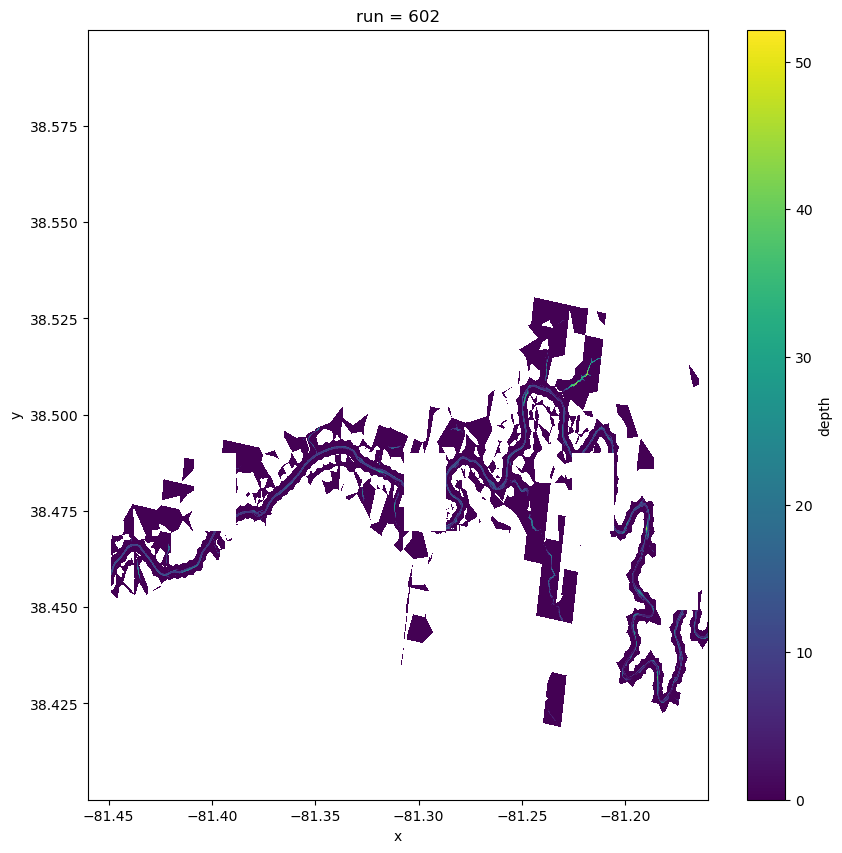

In [5]:
da = ds.depth.sel(x=slice(-81.46, -81.16), y=slice(38.6, 38.4), run=602)
# da.where(da > 0.001).plot.imshow(figsize=(10, 10))
da.plot.imshow(figsize=(10, 10))

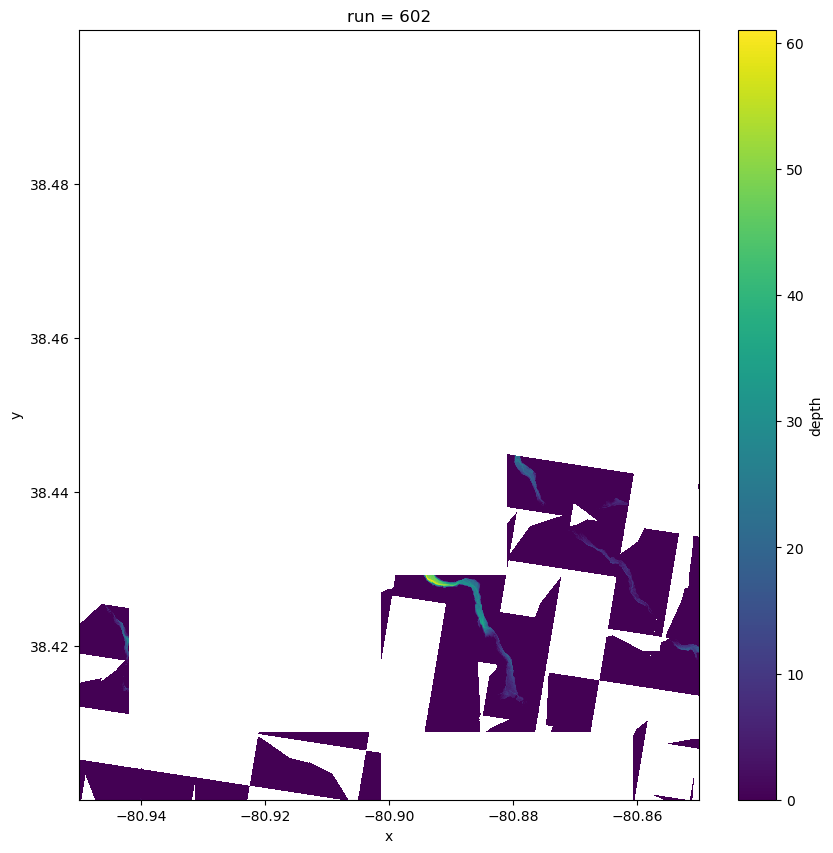

In [6]:
da = ds.depth.sel(x=slice(-80.95, -80.85), y=slice(38.5, 38.4), run=602)
# da.where(da > 0.001).plot.imshow(figsize=(10, 10))
da.plot.imshow(figsize=(10, 10))

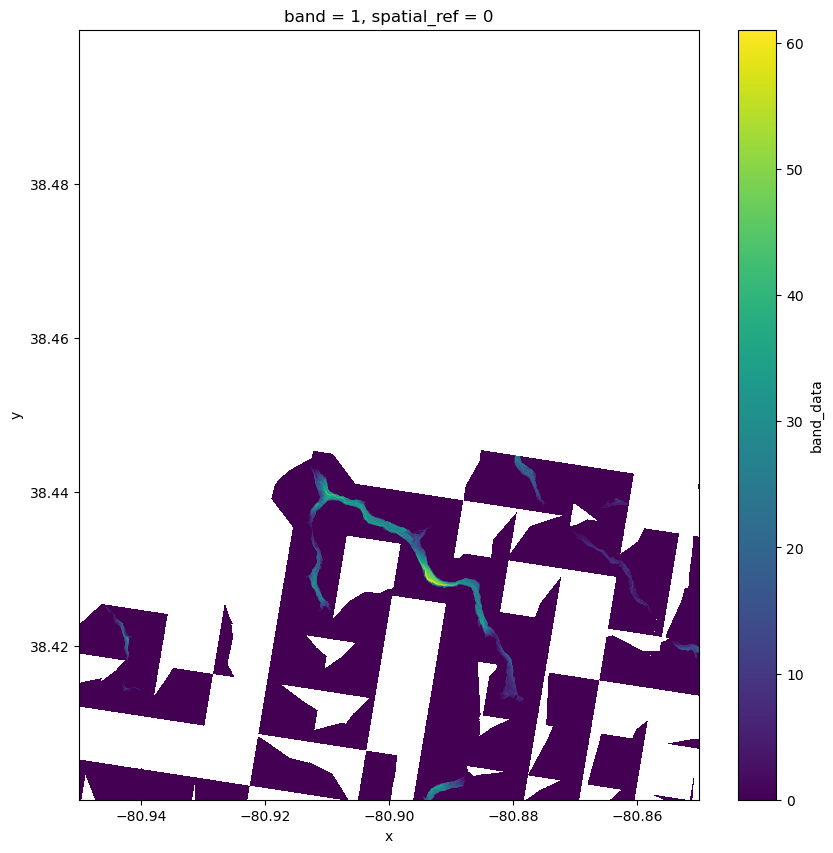

In [9]:
ds = xr.open_dataset("s3://kanawha-pilot/FFRD_Kanawha_Compute/runs/602/depth-grids/ElkMiddle/depth_grid.vrt", engine="rasterio")
# da = ds.band_data.sel(x=slice(-81.4758, -81.3115), y=slice(38.5, 38.425), band=1)
da = ds.band_data.sel(x=slice(-80.95, -80.85), y=slice(38.5, 38.4), band=1)
# da.where(da > 0.001).plot.imshow(figsize=(10, 10))
da.plot.imshow(figsize=(10, 10))

In [ ]:
da = ds.depth.sel(x=slice(-81.46, -81.16), y=slice(38.6, 38.4), run=602)
# da.where(da > 0.001).plot.imshow(figsize=(10, 10))
da.plot.imshow(figsize=(10, 10))

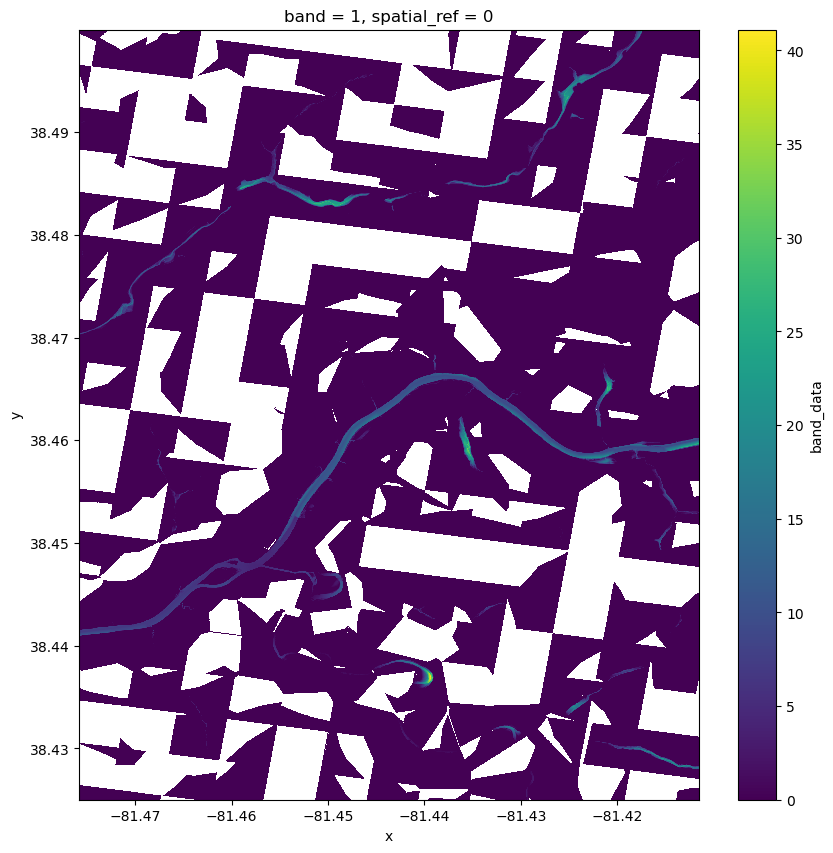

In [2]:
chunks = {
    "x": 64,
    "y": 64,
    "band": 1,
}
# ds = xr.open_dataset('./ElkMiddle.vrt', mask_and_scale=False)
# ds = xr.open_dataset('./run-1.vrt')
# ds = xr.open_dataset('./blah.1.vrt')
with rasterio.Env(GDAL_VRT_ENABLE_PYTHON=True):
    ds = xr.open_dataset('./blah.1.vrt', engine='rasterio')
    da = ds.band_data.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
    # da.where(da > 0.001).plot.imshow(figsize=(10, 10))
    da.plot.imshow(figsize=(10, 10))
# ds

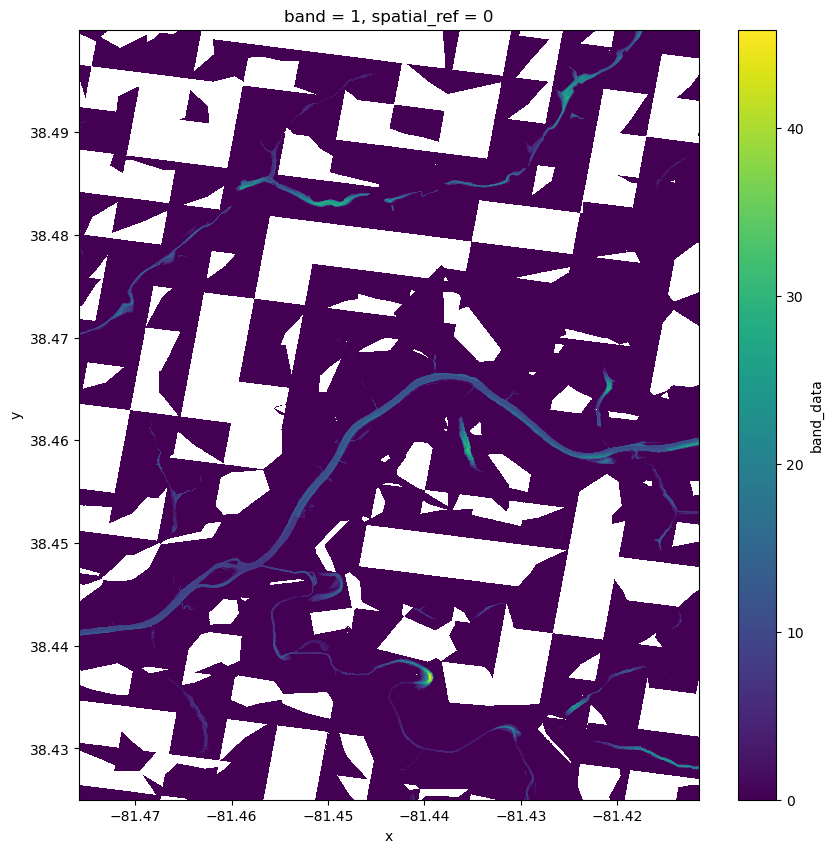

In [6]:
with rasterio.Env(GDAL_VRT_ENABLE_PYTHON=True):
    ds = xr.open_dataset('./blah.2.vrt', engine='rasterio')
    da = ds.band_data.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
    # da.where(da > 0.001).plot.imshow(figsize=(10, 10))
    da.plot.imshow(figsize=(10, 10))

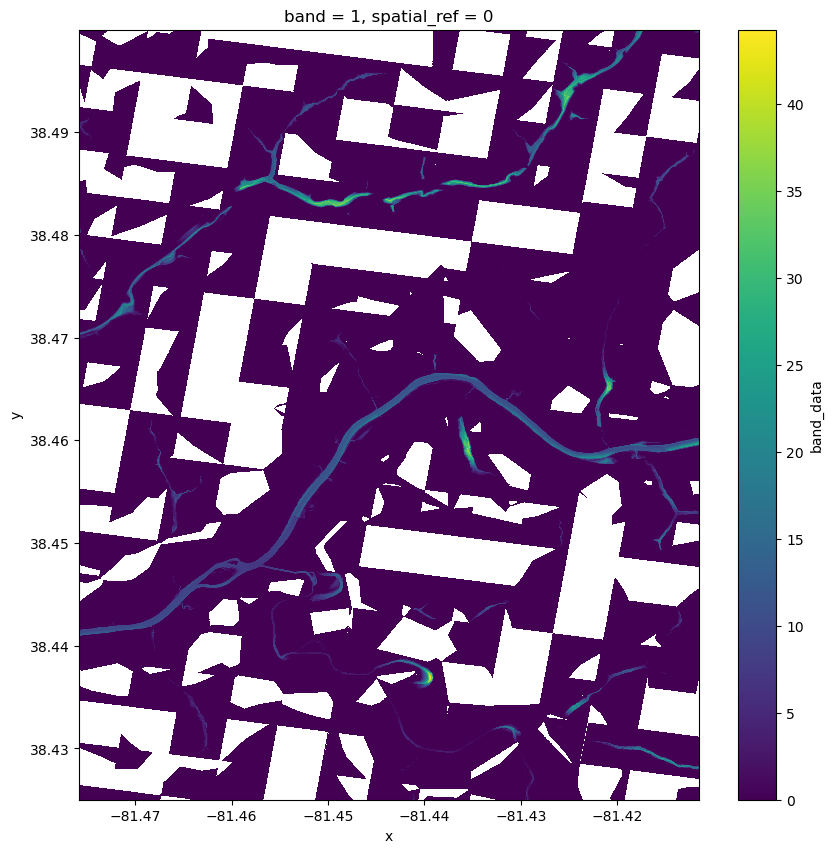

In [7]:
with rasterio.Env(GDAL_VRT_ENABLE_PYTHON=True):
    ds = xr.open_dataset('./blah.3.vrt', engine='rasterio')
    da = ds.band_data.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
    # da.where(da > 0.001).plot.imshow(figsize=(10, 10))
    da.plot.imshow(figsize=(10, 10))

In [3]:
ds.band_data

<xarray.DataArray 'band_data' (band: 1, y: 291686, x: 260871)>
[76092418506 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -82.2 -82.2 -82.2 -82.2 ... -79.62 -79.62 -79.62
  * y            (y) float64 38.87 38.87 38.87 38.87 ... 35.99 35.99 35.99 35.99
    spatial_ref  int64 0

In [4]:
# ds.band_data.sel(x=slice(-81.0, -80.8), y=slice(38.7, 38.5), band=1).plot.imshow(figsize=(10, 10))
# da = ds.band_data.sel(x=slice(-81.0, -80.9), y=slice(38.7, 38.6), band=1)
# da = ds.band_data.sel(x=slice(-81.7, -81.5), y=slice(38.5, 38.3), band=1)
# da = ds.band_data.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
# da = ds.band_data.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
da = ds.sel(x=slice(-81.4758, -81.4115), y=slice(38.5, 38.425), band=1)
# da.where(da > 0.001).plot.imshow(figsize=(10, 10))
da.plot.imshow(figsize=(10, 10))

AttributeError: 'DatasetPlotAccessor' object has no attribute 'imshow'

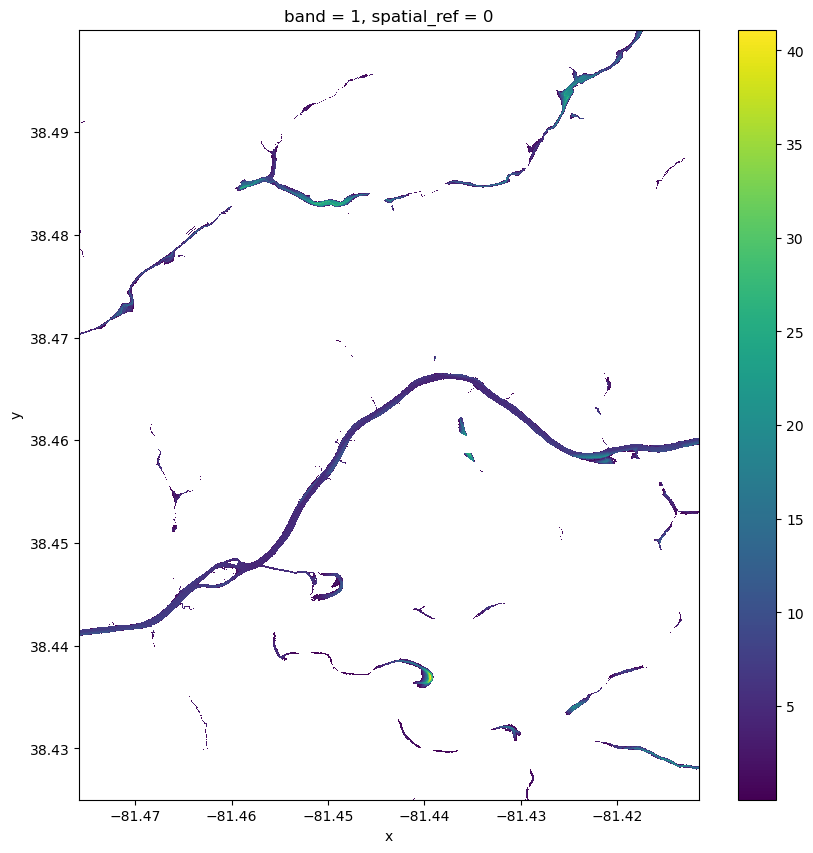

In [ ]:
da.where(da > 0.001).plot.imshow(figsize=(10, 10))